In [ ]:
# Importing libraries
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(0)

In [ ]:
train_data = dsets.MNIST(root = './data', train = True, download = True, transform = transforms.ToTensor())
test_data = dsets.MNIST(root = './data', train = False, download = True, transform = transforms.ToTensor())
print("Print the training dataset:\n ", train_data)
print("\nPrint the test dataset:\n ", test_data)
print(train_data.data.type)
print(train_data.data.dtype)
print(train_data.data.shape)

100%|██████████| 9912422/9912422 [00:00<00:00, 100676113.58it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 15360853.90it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26702283.38it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14432218.76it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

Print the test dataset:
  Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()
<built-in method type of Tensor object at 0x7ff59eeb31f0>
torch.uint8
torch.Size([60000, 28, 28])


In [ ]:
train_loader = DataLoader(dataset=train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=100, shuffle=True)

In [ ]:
def show_image(idx):
  plt.imshow(train_data.data[idx], cmap='gray')
  plt.title('y = %i' % train_data.targets[idx])
  plt.show()

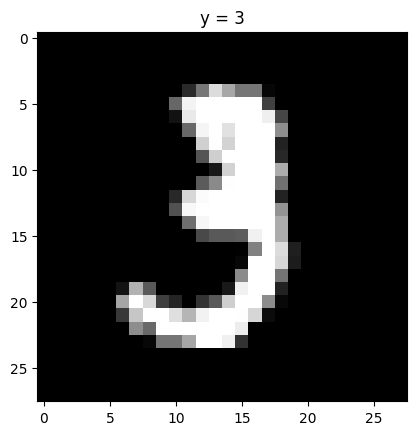

In [ ]:
idx = 10
show_image(idx)

In [ ]:
# X_train = torch.stack((train_data.data, train_data.data, train_data.data), axis=1).type(torch.float32)
# X_test = torch.stack((test_data.data, test_data.data, test_data.data), axis=1).type(torch.float32)
# print(X_train.shape)

In [ ]:
class LeNet5(nn.Module):
  def __init__(self):
    super(LeNet5, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
    self.act1 = nn.Tanh()
    self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)

    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
    self.act2 = nn.Tanh()
    self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)

    self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1)
    self.act3 = nn.Tanh()

    self.flat = nn.Flatten()
    self.fc1 = nn.Linear(120, 84)
    self.act4 = nn.Tanh()
    self.fc2 = nn.Linear(84, 10)

  def forward(self, x):
    # Input - 1X28X28, Output - 6X28X28
    x = self.act1(self.conv1(x))
    # Input - 6X28X28, Output - 6X14X14
    x = self.pool1(x)
    # Input - 6X14X14, Output - 16X10X10
    x = self.act2(self.conv2(x))
    # Input - 16X10X10, Output - 16X5X5
    x = self.pool2(x)
    # Input - 16X5X5, Output - 120X1X1
    x = self.act3(self.conv3(x))
    # Input - 120X1X1, Output - 84
    x = self.act4(self.fc1(self.flat(x)))
    # Input - 84, Output - 10
    x = self.fc2(x)
    return x

In [ ]:
model = LeNet5()

In [ ]:
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters())

In [ ]:
n_epochs = 50
N_test = len(test_data)
cost_train = []
acc_test = []
for epoch in range(1, n_epochs+1):
  total = 0
  for x, y in train_loader:
    opt.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    total += loss.item()
    opt.step()
  cost_train.append(total)
  print("Epoch %d: Training Cost = %d" % (epoch, total))
  correct = 0
  for x_test, y_test in test_loader:
    z = model(x_test)
    _, yhat = torch.max(z.data, 1)
    correct += (yhat == y_test).sum().item()
  accuracy = correct / N_test
  acc_test.append(accuracy*100)
  print("Epoch %d: Model Accuracy on Test Set = %.2f %%" % (epoch, accuracy*100))

Epoch 1: Training Cost = 216
Epoch 1: Model Accuracy on Test Set = 95.98 %
Epoch 2: Training Cost = 68
Epoch 2: Model Accuracy on Test Set = 97.39 %
Epoch 3: Training Cost = 44
Epoch 3: Model Accuracy on Test Set = 97.78 %
Epoch 4: Training Cost = 32
Epoch 4: Model Accuracy on Test Set = 98.27 %
Epoch 5: Training Cost = 26
Epoch 5: Model Accuracy on Test Set = 98.30 %
Epoch 6: Training Cost = 21
Epoch 6: Model Accuracy on Test Set = 98.51 %
Epoch 7: Training Cost = 17
Epoch 7: Model Accuracy on Test Set = 98.48 %
Epoch 8: Training Cost = 14
Epoch 8: Model Accuracy on Test Set = 98.53 %
Epoch 9: Training Cost = 13
Epoch 9: Model Accuracy on Test Set = 98.67 %
Epoch 10: Training Cost = 11
Epoch 10: Model Accuracy on Test Set = 98.77 %
Epoch 11: Training Cost = 8
Epoch 11: Model Accuracy on Test Set = 98.61 %
Epoch 12: Training Cost = 8
Epoch 12: Model Accuracy on Test Set = 98.75 %
Epoch 13: Training Cost = 7
Epoch 13: Model Accuracy on Test Set = 98.60 %
Epoch 14: Training Cost = 6
Epoc

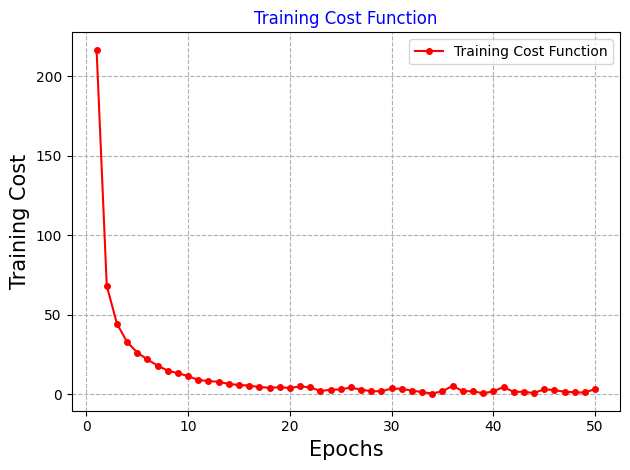

In [ ]:
plt.plot(np.arange(1, n_epochs+1, 1), cost_train, marker=".", markersize="8", label="Training Cost Function", color="red")
plt.xlabel('Epochs', fontsize=15)
plt.ylabel("Training Cost", fontsize=15)
plt.title('Training Cost Function', color="blue")
plt.grid(linestyle='--')
plt.tight_layout()
plt.legend()
plt.show()

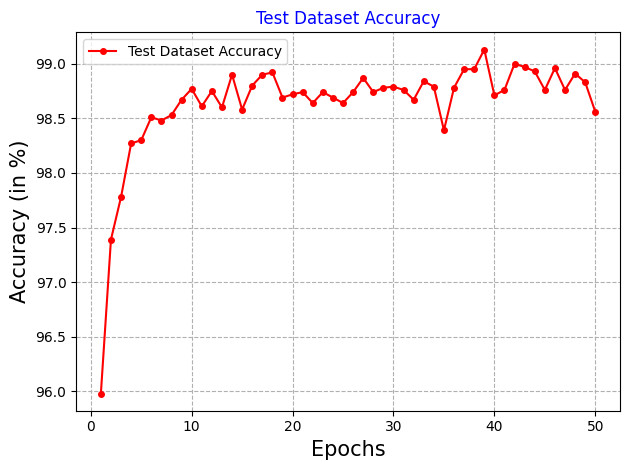

In [ ]:
plt.plot(np.arange(1, n_epochs+1, 1), acc_test, marker=".", markersize="8", label="Test Dataset Accuracy", color="red")
plt.xlabel('Epochs', fontsize=15)
plt.ylabel("Accuracy (in %)", fontsize=15)
plt.title('Test Dataset Accuracy', color="blue")
plt.grid(linestyle='--')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
torch.save(model.state_dict(), './model.pth')

In [ ]:
model = LeNet5()
model.load_state_dict(torch.load('./model.pth'))

<All keys matched successfully>

# **Prediction Section**

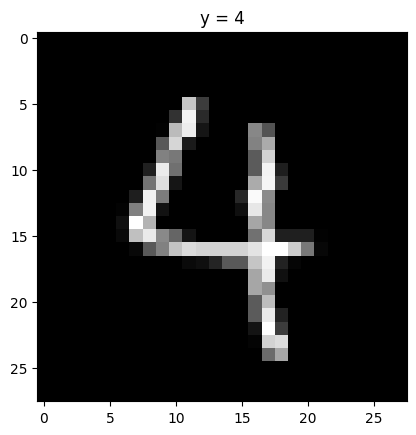

The label of this image is y = 4
The model predicts yhat = 4.


In [ ]:
idx_pred = 24
plt.imshow(test_data.data[idx_pred], cmap='gray')
plt.title('y = %i' % test_data.targets[idx_pred])
plt.show()
x = test_data.data[idx_pred, :, :].type(torch.float32)
x = x.expand(1, 1, 28, 28)
y = test_data.targets[idx_pred]
print(f"The label of this image is y = {int(y)}")
z = model(x)
_, yhat = torch.max(z.data, 1)
yhat = int(yhat.numpy())
print(f"The model predicts yhat = {yhat}.")

In [ ]:
model_copy = LeNet5()
model_copy.load_state_dict(torch.load('./model.pth'))

<All keys matched successfully>

In [ ]:
z_copy = model_copy(x)
_, yhat_copy = torch.max(z_copy.data, 1)
yhat_copy = int(yhat_copy.numpy())
print(f"The copied model predicts yhat = {yhat_copy}.")

The copied model predicts yhat = 4.


# **Testing Real World Examples**

In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00


In [ ]:
%%writefile digit_classifier.py
import streamlit as st
import torch

st.set_option('deprecation.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation=True)
def load_model():
  model = LeNet5()
  model.load_state_dict(torch.load('./model.pth'))
  return model

model = load_model()
st.write("""
        # Digit Classification
        """
        )

file = st.file_uploader("Please upload an image of a digit", type=["jpg", "png"])

import torch.transforms as transforms
def import_and_predict(img, model):
  img_transform = transforms.Compose([transforms.Grayscale(), transforms.RandomInvert(p=1)])
  img_new = img_transform(img)
  img_new.show()
  composed = transforms.Compose([transforms.Resize(28), transforms.ToTensor()])
  img_t = composed(img_new)
  img_t = img_t.type(torch.float32)
  x = img_t.expand(1, 1, 28, 28)
  z = model(x)
  z = nn.Softmax(dim=1)(z)
  p_max, yhat = torch.max(z.data, 1)
  p = float(format(p_max.numpy()[0], '.4f'))*100
  yhat = int(float(yhat.numpy()[0]))
  string = f"The model predicts the image as yhat = {yhat} with {p:.2f} % probability."
  st.success(string)

from PIL import Image
if file is None:
  st.text("Please upload an image file")
else:
  image = Image.open(file)
  st.image(image, use_column_width=True)
  import_and_predict(image, model)

Overwriting digit_classifier.py


In [ ]:
from io import BytesIO
from google.colab import files
from PIL import Image

In [ ]:
uploaded = files.upload()
img = Image.open(BytesIO(uploaded['Image.jpg']))

Saving Image.jpg to Image (1).jpg


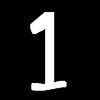

In [ ]:
img_transform = transforms.Compose([transforms.Grayscale(), transforms.RandomInvert(p=1)])
img_new = img_transform(img)
img_new.show()

In [ ]:
composed = transforms.Compose([transforms.Resize(28), transforms.ToTensor()])
img_t = composed(img_new)
img_t = img_t.type(torch.float32)
x = img_t.expand(1, 1, 28, 28)

In [ ]:
z = model(x)
z = nn.Softmax(dim=1)(z)
p_max, yhat = torch.max(z.data, 1)
p = float(format(p_max.numpy()[0], '.4f'))*100
yhat = int(float(yhat.numpy()[0]))
# print(f"As per the user, the given image is of y = {input}.")
print(f"The model predicts the image as yhat = {yhat} with {p:.2f} % probability.")

The model predicts the image as yhat = 1 with 99.81 % probability.
